# Explore open source models


Tasks 

* **Claims identification (binary classification)**
    - model: CARDS on MediaTree data (binary classification + taxonomy)
    - sentiment analysis 
    - preprocessing, chunking

* **Claims classification**
    - compare with results on benchmark (Yoann's work)

* **Text reformulation for humans**


Point 06/12
- dataframe insuffisant pour entraîner des LLM, à enrichir avec d'autres données (les 500 positifs = hard claims) 
- pour les slm : analyse de sentiments pour la partie détection de désinformation (binary classification)

To do:
- explore langchain (prompt engineering, preprocessing, chunking) : découpage des textes 
- bert like llm detection de claim et labellisation et multiclass labelllisation 
- multilang xlmroberta 

Data : 500 Yoann + 5000 Clément 

In [1]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import benchmark on Mediatree
path = "/Users/anne/Desktop/Data4Good/data/4_channels_predictions_with_cards_rewritten_09_2023_09_2024.csv"
df_mediatree = pd.read_csv(
    path,
    index_col=0
)
df_mediatree.head()

,start,text,channel_name,channel_is_radio,channel_program_type,channel_program,themes,keywords,num_keywords,num_tokens,...,contradiction,disinformation_category,disinformation_score,pro_anti,quote,speaker,quote_start,quote_end,cards,improved_text_with_quote
id,,,,,,,,,,,,,,,,,,,,,
52061c3902c0257c7bfae7086ae50ea3998fea4204bcd6628588e41d71340dfc,2023-09-08 19:34:00,c'est non seulement que les utilisent pas mais...,europe1,True,Information - Magazine,Soir,"[""biodiversite_concepts_generaux"", ""biodiversi...","[{""keyword"": ""d\u00e9carboner"", ""timestamp"": 1...",6,449,...,NaN,consensus,high,anti-écologie,les climatologues ne croient plus leurs termes...,narrative,808,862,5_science_uncertain,Ce n'est pas seulement qu'ils ne les utilisent...
34a41bf34b35ee91fc147601fb8c21a366a2f568b9060bbb629698dfd9319801,2023-09-15 19:30:00,jusqu'au trente septembre détaille sofia au qu...,europe1,True,Information - Magazine,Soir,"[""biodiversite_concepts_generaux"", ""ressources...","[{""keyword"": ""terre"", ""timestamp"": 16947991040...",2,533,...,NaN,consensus,high,anti-écologie,Il y a beaucoup de soldats poneys menteurs à t...,narrative,1800,1891,5_science_uncertain,"Jusqu'au trente septembre, détaille Sofia au q..."
0fb8db32982baea27fa4a92220e76331e703d61852c0e8d95550ef6853ffd842,2023-09-20 07:50:00,tente d'échapper à une tempête de pluie d'acid...,europe1,True,Information - Magazine,Europe 1 Matin,"[""biodiversite_concepts_generaux"", ""biodiversi...","[{""keyword"": ""acide"", ""timestamp"": 16951890010...",3,545,...,NaN,consensus,high,anti-écologie,tempête de pluie d'acide mortelle selon l'inrs...,other,23,132,1_its_not_happening,On tente d'échapper à une **tempête de pluie d...
4792f93c6614b1e7ef39e301cc6c1d0f4d3d18b9421cc3a9b18aa5c7581c9e02,2023-10-02 07:54:00,de français n'arrive pas à se loger c'est offi...,europe1,True,Information - Magazine,Europe 1 Matin,"[""changement_climatique_causes"", ""changement_c...","[{""keyword"": ""eaux"", ""timestamp"": 169622615203...",6,573,...,NaN,narrative,high,anti-écologie,Ça va de l'interdiction des avions d'affaires ...,consensus,806,947,3_impacts_not_bad,"Les Français n'arrivent pas à se loger, c'est ..."
74c05fdbca4aeffb643abf0de486b57f8299051d4ef71b58b532791a33aba423,2023-10-05 19:54:00,climatique le réchauffement collecte de grenob...,europe1,True,Information - Magazine,Soir,"[""changement_climatique_constat_indirectes"", ""...","[{""keyword"": ""terre"", ""timestamp"": 16965285020...",1,499,...,Elle contredit les impacts largement documenté...,consensus,high,anti-écologie,on ne peut pas faire le lien directement avec ...,consensus,1316,1378,2_humans_not_the_cause,Le réchauffement climatique a été collecté à G...


In [3]:
# import desmog data 
path = "/Users/anne/Desktop/Data4Good/data/best_quote_labeled.xlsx"
df_desmog = pd.read_excel(
    path,
    index_col=0,
    sheet_name='result_full'
)
df_desmog.head()

,countries,item_type,url,section_source,quote,label_raw,label,word_count,is_full
name,,,,,,,,,
Rupert Murdoch,"['United States', ' Australia']",individual,https://www.desmog.com/rupert-murdoch/,stance_quotes,Murdoch’s News Corporation actually thought ca...,0_accepted,0_accepted,11,True
Rupert Murdoch,"['United States', ' Australia']",individual,https://www.desmog.com/rupert-murdoch/,stance_quotes,News Corp has meticulously documented its own ...,0_accepted,0_accepted,27,True
Rupert Murdoch,"['United States', ' Australia']",individual,https://www.desmog.com/rupert-murdoch/,stance_quotes,"For years, News Corp entities, whether digital...",6_scientists_are_biased,6_scientists_are_biased,57,True
Rupert Murdoch,"['United States', ' Australia']",individual,https://www.desmog.com/rupert-murdoch/,stance_quotes,Rupert Murdoch and Fox is part of a larger iss...,0_accepted,0_accepted,16,True
Rupert Murdoch,"['United States', ' Australia']",individual,https://www.desmog.com/rupert-murdoch/,stance_quotes,"To the extent that anyone feeds, amplifies, ex...",0_accepted,0_accepted,19,True


In [4]:
# transform df_mediatree labels into df_desmog labels
cards = df_mediatree.cards.unique()
cards.sort()
label = df_desmog.dropna().label.unique()
label.sort()
labels = {}
i = 0 
for l in cards:
    labels[l] = label[i+1]
    i+=1
labels

df_mediatree['cards'] = df_mediatree['cards'].apply(lambda x: labels[x])

med = pd.DataFrame(df_mediatree.groupby('cards').count()['start'] / df_mediatree.groupby('cards').count()['start'].sum())
des = pd.DataFrame(df_desmog.groupby('label').count()['countries'] / df_desmog.groupby('label').count()['countries'].sum())
label_distribution = des.merge(med, how='outer', left_index=True, right_index=True).fillna(0)
label_distribution.rename(columns={'countries':'desmog', 'start':'mediatree'}, inplace=True)

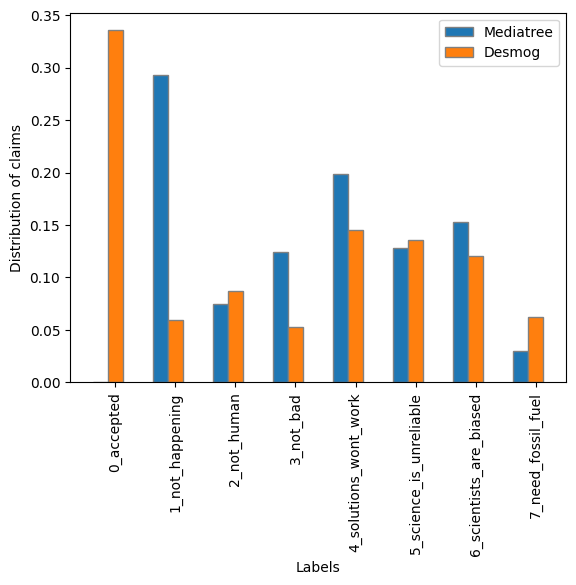

In [63]:
barWidth = 0.25
fig = plt.subplots() #figsize =(12, 8) 

labels = label_distribution.index
br1 = np.arange(len(labels)) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, label_distribution['mediatree'], width = barWidth, 
        edgecolor ='grey', label ='Mediatree') 
plt.bar(br2, label_distribution['desmog'], width = barWidth, 
        edgecolor ='grey', label ='Desmog') 

# Adding Xticks 
plt.xlabel('Labels') #, fontweight ='bold', fontsize = 15
plt.ylabel('Distribution of claims')
plt.xticks([r + barWidth for r in range(len(labels))], labels, rotation=90)

plt.legend()
plt.show()

In [70]:
print('Average number of words in Mediatree transcripts: ', round(df_mediatree['text'].apply(lambda t: len(t.split())).mean()) )
print('Average number of words in Mediatree quotes: ', round(df_mediatree['quote'].apply(lambda t: len(t.split())).mean()) )
print('Average number of words in Desmog quotes: ', round(df_desmog['quote'].apply(lambda t: len(t.split())).mean()) )

Average number of words in Mediatree transcripts:  393
Average number of words in Mediatree quotes:  16
Average number of words in Desmog quotes:  56


In [72]:
print(len(df_mediatree))
print(len(df_desmog))

564
5371


In [71]:
pprint.pprint(df_mediatree.iloc[0].text)
pprint.pprint(df_desmog.iloc[:10].quote.values)

("c'est non seulement que les utilisent pas mais en plus ça nous fait croire "
 "qu'il y en a pas ça fait des primes et tout le monde parmi ses mille cinq "
 "cents solutions ia il y a des idées des avancées en termes d'énergie on "
 "vient d'en parler et vous avez cité notamment prendre le la chaleur des "
 'parkings pour chauffer les maisons ces solutions elles sont là parce que le '
 "vingt et unième siècle a décidé d'une nouvelle donne pour l'énergie onze "
 'débarrasse du fossile qui a fait tourner les voitures fabuleuse invention la '
 'voiture un du xxe siècle les usines aussi les trains et toutes sortes de '
 "choses mais choses bertrand mais piccard c'est un peu le chien qui se mord "
 'la queue bien entendu on aurait dû faire la transition avant mais maintenant '
 'que la chaleur monte que la température des océans est-elle que les '
 'climatologues ne croit plus leurs termes honnêtes comment on fait dans ces '
 "conditions pour créer de l'énergie aussi nouvelle soit elle est

==> Nécessité d'homogénéiser les formats des deux sources de données. Il n'y a pas de contexte avec desmog, seulement la quote.

In [ ]:
# https://huggingface.co/crarojasca/TaxonomyAugmentedCARDS 
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig
import torch 

# Models
MAX_LEN = 256
BINARY_MODEL_DIR = "crarojasca/BinaryAugmentedCARDS"

# Loading tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    BINARY_MODEL_DIR,
    max_length = MAX_LEN, 
    padding = "max_length", 
    return_token_type_ids = True
)

# Loading Models
## 1. Binary Model
print("Loading binary model: {}".format(BINARY_MODEL_DIR))
config = AutoConfig.from_pretrained(BINARY_MODEL_DIR)
binary_model = AutoModelForSequenceClassification.from_pretrained(BINARY_MODEL_DIR, config=config)

def binary_predictions(text):
    tokenized_text = tokenizer(text, return_tensors = "pt")

    # Running Binary Model
    outputs = binary_model(**tokenized_text)
    binary_score = outputs.logits.softmax(dim = 1)
    binary_prediction = torch.argmax(outputs.logits, axis=1)
    binary_predictions = binary_prediction.to('cpu').item()
    
    return binary_predictions

small_mediatree_texts = df_mediatree[df_mediatree.num_tokens < MAX_LEN]

Loading binary model: crarojasca/BinaryAugmentedCARDS


In [91]:
list(small_mediatree_texts.text)

["j'étais tout l'été avec des concessionnaires riesener gre les voitures pour faire un peu de route bien sûr les gens les rendent on a subventionné l'achat de voitures électriques il y avait des incitations qu'elle pensait enfin des baisses de prix et ça a permis de faire augmenter le marché chinois et américain avec nous tesla a même pas bénéficier des bourrelets idem pour les éoliennes amenées au lieu de six éoliennes non c'est fini on n'arrive plus en plus il y avait un un article euh je crois que c'est dans le figaro dans le monde l'un des deux qui montrait qui montraient qu'on ne peut plus fabriquer en ce monde éolien ça marche pas et c'est là",
 "gens doivent dont matches vient de nous parler les radicaux de la décroissance est d'ailleurs il a eu cette formule emmanuel macron ni le déni ni la cure une sorte de en même temps négatives autrement dit ni le catastrophisme d'antonio guterres avait le secrétaire général des nations unies qui nous parle de dystopie climatique les portes

In [104]:
for v in small_mediatree_texts.improved_text_with_quote.values:
    pprint.pprint(v)
    print(binary_predictions(v))

("J'étais tout l'été avec des concessionnaires, à essayer les voitures pour "
 'faire un peu de route. Bien sûr, les gens les rendent. On a subventionné '
 "l'achat de voitures électriques, il y avait des incitations, des baisses de "
 'prix, et ça a permis de faire augmenter le marché chinois et américain. Avec '
 "nous, Tesla n'a même pas bénéficié des subventions. Idem pour les éoliennes, "
 "amenées au lieu de six éoliennes, non, c'est fini, on n'y arrive plus. En "
 "plus, il y avait un article, je crois que c'est dans le Figaro ou dans Le "
 "Monde, l'un des deux, qui montrait **qu'on ne peut plus fabriquer en ce "
 'monde éolien, ça marche pas.**')
0
('Les gens doivent donc se rendre compte que les radicaux de la décroissance, '
 "d'ailleurs, ont cette formule d'Emmanuel Macron : ni le déni, ni la cure. "
 'Une sorte de "en même temps" négatif. Autrement dit, ni le catastrophisme '
 "d'Antonio Guterres, le secrétaire général des Nations Unies, qui nous parle "
 "de dystopie clim

In [10]:
pprint.pprint(small_mediatree_texts.iloc[-1].improved_text_with_quote)

('Il y a seulement deux mille ans à peu près, je voudrais savoir si nous avons '
 'la certitude scientifique que, dans les temps très anciens, en examinant les '
 'carottes glaciaires, nous avons trouvé que **la montée du CO2 de '
 "l'atmosphère a précédé la montée de la température**. Bien que la montée de "
 "la température ait également précédé, car pour l'ère du Christ, nous sommes "
 'à cinquante entrées. Mais je pense que quand on remonte à des milliers '
 "d'années, nous devons avoir une précision encore moins grande. Donc, pour "
 'moi, je me demande quelle...')


In [ ]:
# https://huggingface.co/climatebert/distilroberta-base-climate-sentiment
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from transformers.pipelines.pt_utils import KeyDataset
import datasets
from tqdm.auto import tqdm

dataset_name = "climatebert/climate_sentiment"
model_name = "climatebert/distilroberta-base-climate-sentiment"

# If you want to use your own data, simply load them as 🤗 Datasets dataset, see https://huggingface.co/docs/datasets/loading
dataset = datasets.load_dataset(dataset_name, split="test")

model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name, max_len=512)

pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)

In [14]:
for t in list(small_mediatree_texts.text):
    print(pipe(t, padding=True, truncation=True))

[{'label': 'neutral', 'score': 0.5048060417175293}]
[{'label': 'risk', 'score': 0.4706234931945801}]
[{'label': 'neutral', 'score': 0.5238759517669678}]
[{'label': 'neutral', 'score': 0.5299233198165894}]
[{'label': 'neutral', 'score': 0.578927218914032}]
[{'label': 'neutral', 'score': 0.5892634987831116}]


==> Ces exemples sont trop complexes. Il faut choisir des textes plus simples.

In [18]:
for v in df_mediatree.sample(10).improved_text_with_quote:
    pprint.pprint(v) 

('Ils disent être préoccupés par les problématiques environnementales, et '
 'pourtant cela ne se traduit pas dans les faits. En ce qui concerne '
 "l'agriculture, un Français sur quatre déclare qu'il lui arrive de jeter des "
 'déchets par la fenêtre de sa voiture. Parmi les principaux déchets, on '
 'trouve les mégots de cigarettes, **une pollution qui affecte encore moins '
 'les jeunes fumeurs**. Un mégot met dix ans avant de se désagréger. Alors, je '
 "ne sais pas ce qu'attestent ces gens. Certains ont la solution. Moi, ça "
 "m'est déjà arrivé de voir quelqu'un jeter un McDonald's par la fenêtre. J'ai "
 'ramassé et je lui ai remis par la portière. Il faut rappeler que jeter vos '
 "déchets sur la voie publique ou privée est puni d'une amende de cent "
 'trente-cinq euros. La solution est simple : jetez vos déchets à la poubelle. '
 "Les vacances battent leur plein, et c'est le moment pour les membres du "
 'gouvernement de marquer une pause estivale. Comme chaque année, des '
 

In [ ]:
"Il faut réexaminer cette demande de l'entreprise danoise. En matière de "
 'droit administratif, le tribunal administratif doit connaître son affaire. '
 'Oui, il y a des lois et règlements en France, et donc il doit les appliquer. '
 "C'est difficile de prendre parti. De plus, il y a un élément extrêmement "
 "technique. Qu'est-ce qui est reproché finalement à cette usine ? C'est un "
 'investisseur danois, mais il est question de créer trente emplois. Il y a '
 'deux reproches : ces énergies sont à la fois énergivores et polluantes. En '
 'plus, cette laine de roche a des effets cancérigènes, des effets nocifs pour '
 'la santé. La technique consiste à prendre de la roche volcanique, qui est '
 "importée de loin, d'Allemagne ou d'Europe de l'Est, et de la faire venir. "
 'Cela engendre des dépenses en carbone. Vous utilisez des produits chimiques '
 'et vous chauffez ça à mille quatre cents degrés, donc cela consomme '
 "énormément d'énergie, ce qui entraîne à nouveau des émissions de CO2. Le "
 "but, c'est de produire de la laine de roche, qui est moins chère que la "
 'fameuse laine de verre, pour pouvoir ensuite isoler. Comme vous le savez, il '
 "y a un grand boom de l'isolation, puisque le gouvernement fait des "
 "incitations à tous crins, si j'ose dire, pour isoler les maisons. Au nom de "
 'quoi ? Moins de CO2, protection de la planète, etc. Rappelons que la France '
 "émet un pour cent du CO2 mondial. Donc, ce n'est pas parce qu'on va couvrir "
 "tous les bâtiments en France de laine de verre ou de laine de roche qu'on va "
 'changer quoi que ce soit au réchauffement climatique. Il faut vraiment que '
 'les gens aient cela en tête. On le répète, car **il y a une telle '
 'propagande, un matraquage**. On assiste à trois phénomènes, mais je ne peux '
 "que poser des questions. Je n'ai malheureusement pas de réponses, je suis "
 "désolé de vous frustrer. La première question est de savoir s'il n'y a pas "
 "une folie verte qui s'est emparée de nos dirigeants. La folie verte, c'est "
 "quoi ? C'est de dépenser énormément de CO2 pour installer des éoliennes, des "
 'panneaux solaires, des usines à recycler, et enfin, la forêt pour installer '
 'des usines qui produisent de la laine.'"